<a href="https://colab.research.google.com/github/aapte11/DS-Sprint-02-Storytelling-With-Data/blob/master/LS_DS_122_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

# Update Seaborn

Make sure you have at least version 0.9.0

In [2]:
!pip install --upgrade seaborn

# Make sure to Restart Runtime after the install

# !pip install seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
  
# wget takes raw py file in github and imports it like a library
    
import misleading 

--2018-11-13 21:28:44--  https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1641 (1.6K) [text/plain]
Saving to: ‘misleading.py.2’

misleading.py.2     100%[===================>]   1.60K  --.-KB/s    in 0s      

2018-11-13 21:28:44 (184 MB/s) - ‘misleading.py.2’ saved [1641/1641]



#### Fix misleading plot #1

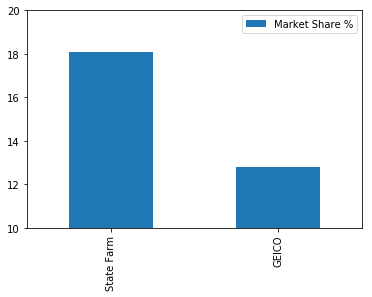

In [4]:
misleading.plot1() # Plot doesn't start at 0, distorts the relative market size

# Instead of 18.07 / 12.79 it's 8.07 / 2.79

In [5]:
insurance = misleading.insurance

insurance

,Market Share %
State Farm,18.07
GEICO,12.79


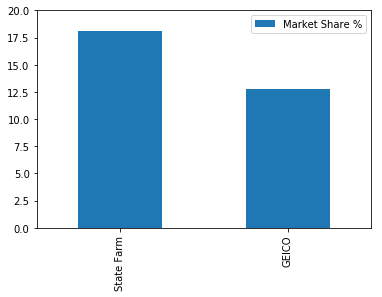

In [6]:
# Fix

insurance.plot.bar(ylim=(0, 20))

#### Fix misleading plot #2

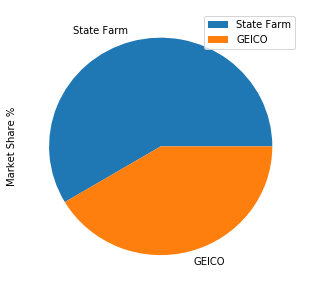

In [7]:
misleading.plot2() # Pie Chart does not add up to 100%

In [9]:
# How to add a row based on a function of other rows

a = 100 - insurance.loc['State Farm'] - insurance.loc['GEICO']

# print(a[0])

s = pd.Series(a, index=['Market Share %'])
# print(s)

df_new = insurance.append(s, ignore_index=True)

index=['State Farm', 'GEICO', 'Other']

df_new.rename({0:'State Farm',1:'GEICO',2:'Other'}, axis='index', inplace = True)

df_new

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc113aed898>],
      dtype=object)

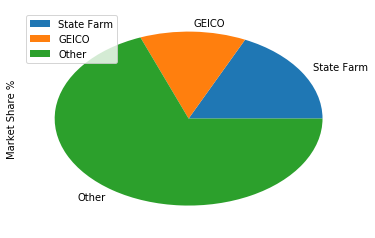

In [10]:
# Fix

df_new.plot(kind = 'pie', subplots = True)

#### Fix misleading plot #3

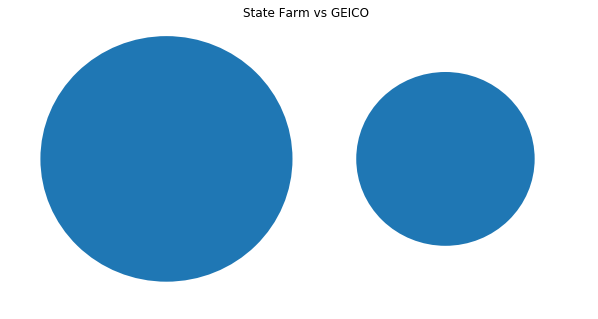

In [11]:
misleading.plot3() # Bubble Plot doesn't have metrics and doesn't describe actual relative size, large circle s/b 41% larger

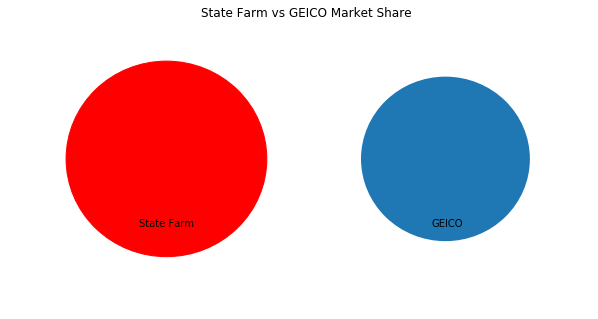

The expected size ratio should be 1.4128225175918687 and the actual ratio is 1.412822517591869


In [19]:
# Fix

import matplotlib.pyplot as plt
from numpy import sqrt, pi


fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((0, 80))
ax.set_ylim((0, 40))
plt.axis('off')

a = sqrt(18.07/pi)
b = sqrt(12.79/pi)


circle = plt.Circle(xy=(20, 20), radius=6*a, color ='r', label = 'State Farm')
ax.add_artist(circle)
plt.text(16, 10, "State Farm")

circle = plt.Circle(xy=(60, 20), radius=6*b, label = 'GEICO')
ax.add_artist(circle)
plt.text(58, 10, "GEICO")


plt.title('State Farm vs GEICO Market Share')
plt.show()

c = 18.07/12.79
d = (a/b)**2

print("The expected size ratio should be {} and the actual ratio is {}".format(c, d))

#### Fix misleading plot #4

In [20]:
misleading.plot4() # Not relative to population

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

In [21]:
# Fix

'''def plot4():
    # Based on https://altair-viz.github.io/gallery/choropleth_repeat.html
    import altair as alt
    from vega_datasets import data

    url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
    df = pd.read_csv(url)
    df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
    variable = 'State Farm policy premiums'

    states = alt.topo_feature(data.us_10m.url, 'states')

    return alt.Chart(states).mark_geoshape().encode(
        alt.Color(variable, type='quantitative')
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(df, 'id', [variable])
    ).properties(
        width=500,
        height=300
    ).project(
        type='albersUsa'
    )
'''




url = 'https://raw.githubusercontent.com/aapte11/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'

df_ins = pd.read_csv(url)

df_ins.head()


,state,id,STATE FARM GRP,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [22]:
df_ins['SF Market'] = 100 * df_ins['STATE FARM GRP'] / df_ins['STATE TOTAL']
df_ins['BH Market'] = 100 * df_ins['BERKSHIRE HATHAWAY GRP'] / df_ins['STATE TOTAL']

df_ins.head()

,state,id,STATE FARM GRP,BERKSHIRE HATHAWAY GRP,STATE TOTAL,SF Market,BH Market
0,Alabama,1,768213,282947,3025561,25.390762,9.351885
1,Alaska,2,128613,81366,454623,28.290034,17.897467
2,Arizona,4,760003,604049,4373055,17.379223,13.812975
3,Arkansas,5,454931,96908,1777917,25.587865,5.450648
4,California,6,3655463,2091720,25255501,14.473928,8.282235


In [23]:
import altair as alt
from vega_datasets import data

variable = 'SF Market'

states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(alt.Color(variable, type='quantitative')
    ).transform_lookup(lookup='id', from_=alt.LookupData(df_ins, 'id', [variable])
    ).properties(width=500, height=300).project(type='albersUsa')

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'SF Market',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  STATE FARM GRP  BERKSHIRE HATHAWAY GRP  \
      0                Alabama   1          768213                  282947   
      1                 Alaska   2          128613                   81366   
      2                Arizona   4          760003                  604049   
      3               Arkansas   5          454931                   96908   
      4             California   6         3655463                 2091720   
      5               Colorado   8          827143                  365797   
      6            Connecticut   9          169773                  486498   
      7               Delaware  10          191319                  129033   
      8   District of Columbia  11           67231                  115149   
      9                Florida  12         2806322                 3952147   
      10               Georgia  13         1761224                  821326   
      11                Hawaii  15          133498                  184743   
      12                 Idaho  16          130613                   87222   
      13              Illinois  17         2256543                  412978   
      14               Indiana  18          861382                  201200   
      15                  Iowa  19          368898                   58105   
      16                Kansas  20          351343                   76533   
      17              Kentucky  21          680433                  186915   
      18             Louisiana  22         1415980                  369492   
      19                 Maine  23          101111                   68109   
      20              Maryland  24          883401                 1059508   
      21         Massachusetts  25               0                  473913   
      22              Michigan  26         1580398                       0   
      23             Minnesota  27          851940                  108942   
      24           Mississippi  28          467887                  100827   
      25              Missouri  29          883774                  214191   
      26               Montana  30          156816                   33538   
      27              Nebraska  31          273727                   61046   
      28                Nevada  32          404688                  262815   
      29         New Hampshire  33          103340                  103403   
      30            New Jersey  34          619623                 1441019   
      31            New Mexico  35          261922                  174865   
      32              New York  36         1666653                 3926684   
      33        North Carolina  37          842368                  560700   
      34          North Dakota  38           67282                   15516   
      35                  Ohio  39         1240075                  405652   
      36              Oklahoma  40          636063                  151388   
      37                Oregon  41          564416                  223187   
      38          Pennsylvania  42         1654528                  602848   
      39          Rhode Island  44               0                   97597   
      40        South Carolina  45          874436                  426033   
      41          South Dakota  46          101912                   15682   
      42             Tennessee  47          889329                  292357   
      43                 Texas  48         3395165                 2127633   
      44                  Utah  49  

In [24]:
variable = 'BH Market'

states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(alt.Color(variable, type='quantitative')
    ).transform_lookup(lookup='id', from_=alt.LookupData(df_ins, 'id', [variable])
    ).properties(width=500, height=300).project(type='albersUsa')

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'BH Market',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  STATE FARM GRP  BERKSHIRE HATHAWAY GRP  \
      0                Alabama   1          768213                  282947   
      1                 Alaska   2          128613                   81366   
      2                Arizona   4          760003                  604049   
      3               Arkansas   5          454931                   96908   
      4             California   6         3655463                 2091720   
      5               Colorado   8          827143                  365797   
      6            Connecticut   9          169773                  486498   
      7               Delaware  10          191319                  129033   
      8   District of Columbia  11           67231                  115149   
      9                Florida  12         2806322                 3952147   
      10               Georgia  13         1761224                  821326   
      11                Hawaii  15          133498                  184743   
      12                 Idaho  16          130613                   87222   
      13              Illinois  17         2256543                  412978   
      14               Indiana  18          861382                  201200   
      15                  Iowa  19          368898                   58105   
      16                Kansas  20          351343                   76533   
      17              Kentucky  21          680433                  186915   
      18             Louisiana  22         1415980                  369492   
      19                 Maine  23          101111                   68109   
      20              Maryland  24          883401                 1059508   
      21         Massachusetts  25               0                  473913   
      22              Michigan  26         1580398                       0   
      23             Minnesota  27          851940                  108942   
      24           Mississippi  28          467887                  100827   
      25              Missouri  29          883774                  214191   
      26               Montana  30          156816                   33538   
      27              Nebraska  31          273727                   61046   
      28                Nevada  32          404688                  262815   
      29         New Hampshire  33          103340                  103403   
      30            New Jersey  34          619623                 1441019   
      31            New Mexico  35          261922                  174865   
      32              New York  36         1666653                 3926684   
      33        North Carolina  37          842368                  560700   
      34          North Dakota  38           67282                   15516   
      35                  Ohio  39         1240075                  405652   
      36              Oklahoma  40          636063                  151388   
      37                Oregon  41          564416                  223187   
      38          Pennsylvania  42         1654528                  602848   
      39          Rhode Island  44               0                   97597   
      40        South Carolina  45          874436                  426033   
      41          South Dakota  46          101912                   15682   
      42             Tennessee  47          889329                  292357   
      43                 Texas  48         3395165                 2127633   
      44                  Utah  49  

In [25]:
# Original Misleading plot

variable = 'STATE FARM GRP'

states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(alt.Color(variable, type='quantitative')
    ).transform_lookup(lookup='id', from_=alt.LookupData(df_ins, 'id', [variable])
    ).properties(width=500, height=300).project(type='albersUsa')

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'STATE FARM GRP',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  STATE FARM GRP  BERKSHIRE HATHAWAY GRP  \
      0                Alabama   1          768213                  282947   
      1                 Alaska   2          128613                   81366   
      2                Arizona   4          760003                  604049   
      3               Arkansas   5          454931                   96908   
      4             California   6         3655463                 2091720   
      5               Colorado   8          827143                  365797   
      6            Connecticut   9          169773                  486498   
      7               Delaware  10          191319                  129033   
      8   District of Columbia  11           67231                  115149   
      9                Florida  12         2806322                 3952147   
      10               Georgia  13         1761224                  821326   
      11                Hawaii  15          133498                  184743   
      12                 Idaho  16          130613                   87222   
      13              Illinois  17         2256543                  412978   
      14               Indiana  18          861382                  201200   
      15                  Iowa  19          368898                   58105   
      16                Kansas  20          351343                   76533   
      17              Kentucky  21          680433                  186915   
      18             Louisiana  22         1415980                  369492   
      19                 Maine  23          101111                   68109   
      20              Maryland  24          883401                 1059508   
      21         Massachusetts  25               0                  473913   
      22              Michigan  26         1580398                       0   
      23             Minnesota  27          851940                  108942   
      24           Mississippi  28          467887                  100827   
      25              Missouri  29          883774                  214191   
      26               Montana  30          156816                   33538   
      27              Nebraska  31          273727                   61046   
      28                Nevada  32          404688                  262815   
      29         New Hampshire  33          103340                  103403   
      30            New Jersey  34          619623                 1441019   
      31            New Mexico  35          261922                  174865   
      32              New York  36         1666653                 3926684   
      33        North Carolina  37          842368                  560700   
      34          North Dakota  38           67282                   15516   
      35                  Ohio  39         1240075                  405652   
      36              Oklahoma  40          636063                  151388   
      37                Oregon  41          564416                  223187   
      38          Pennsylvania  42         1654528                  602848   
      39          Rhode Island  44               0                   97597   
      40        South Carolina  45          874436                  426033   
      41          South Dakota  46          101912                   15682   
      42             Tennessee  47          889329                  292357   
      43                 Texas  48         3395165                 2127633   
      44                  Utah 

#### Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [xkcd](https://xkcd.com/1138/)
- [Surprise Maps: Showing the Unexpected](https://medium.com/@uwdata/surprise-maps-showing-the-unexpected-e92b67398865)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

#### Links
- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)
- [Chart Chooser](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [27]:
df.shape

(44, 3)

### See the data

In [28]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [29]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
grouped_df = df.groupby('dataset')



### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [31]:
grouped_df.describe().transpose()

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [32]:
grouped_df.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [33]:
grouped_df.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [34]:
grouped_df.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [35]:
grouped_df.corr() # Correlations within groups

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

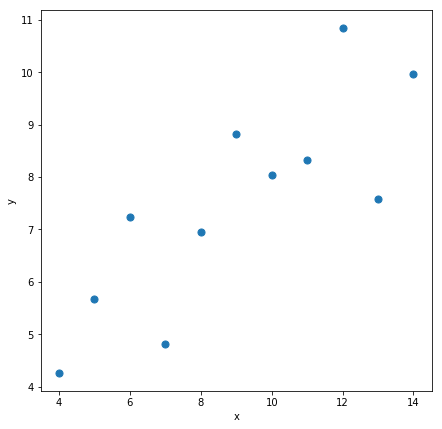

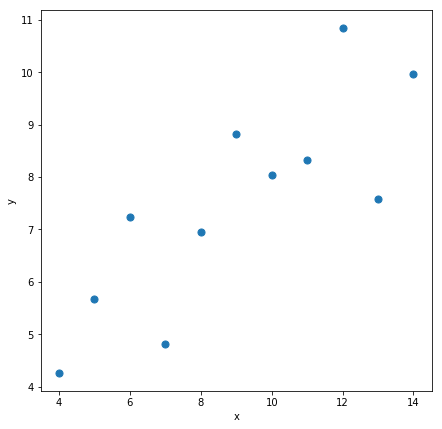

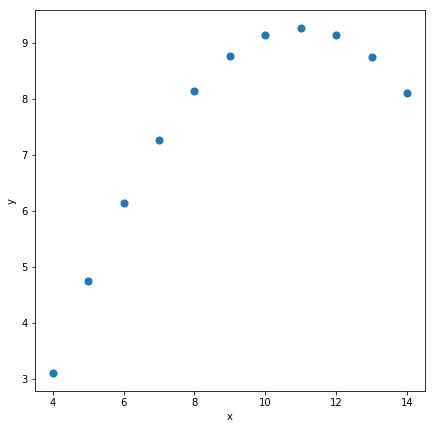

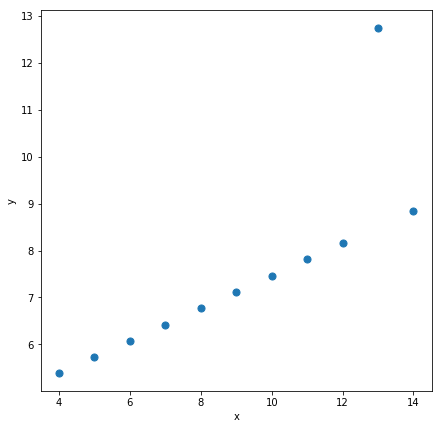

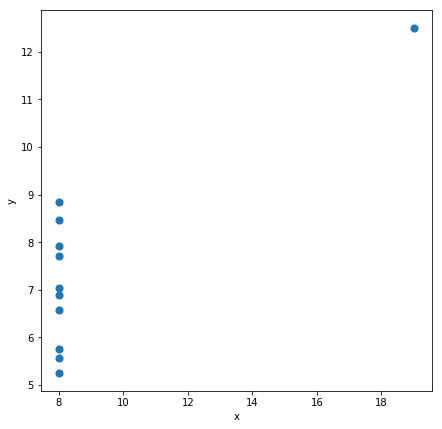

In [36]:
# titles = ['Dataset I', 'Dataset II', 'Dataset III', 'Dataset IV']

axes = grouped_df.plot.scatter('x','y', s = 50, subplots = True, figsize = (7,7))


# axes[0].title('Dataset I')
# axes[1].title('Dataset II')
# axes[2].title('Dataset III')
# axes[3].title('Dataset IV')

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

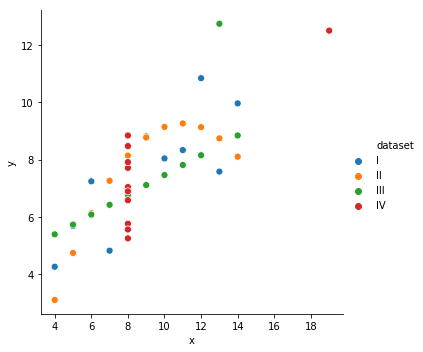

In [37]:
sns.relplot('x', 'y', data = df, hue = 'dataset', s = 50) # All on the same plot

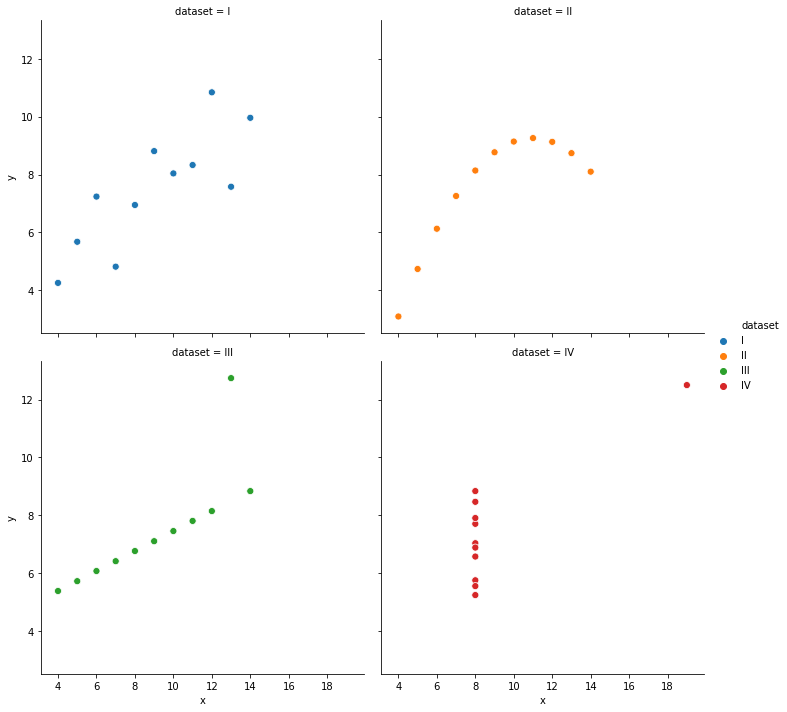

In [38]:
sns.relplot('x', 'y', data = df, col = 'dataset', hue = 'dataset', col_wrap = 2, s = 50) # Different plots

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

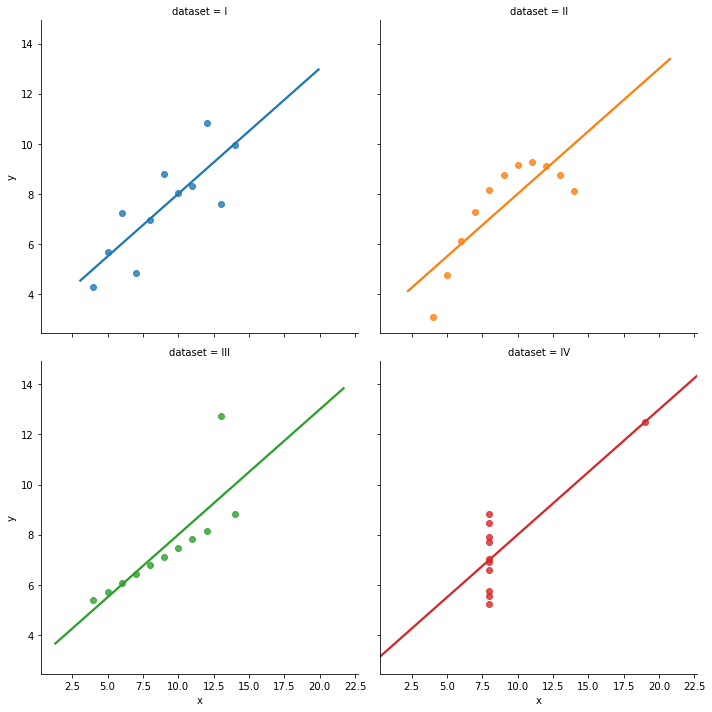

In [39]:
sns.lmplot('x', 'y', data = df, col = 'dataset', hue = 'dataset', col_wrap = 2, ci = None) 

# "col =" makes subplots, "col_wrap=" puts figures in different frames, "ci = None" removes confidence intervals

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [41]:
tips.shape

(244, 7)

### See the first 5 rows

In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe the data

In [43]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

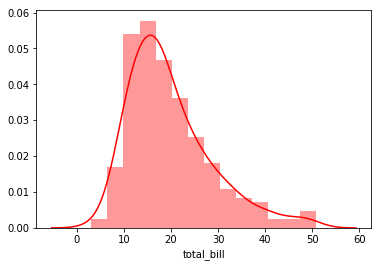

In [44]:
sns.distplot(tips.total_bill, color = 'red')


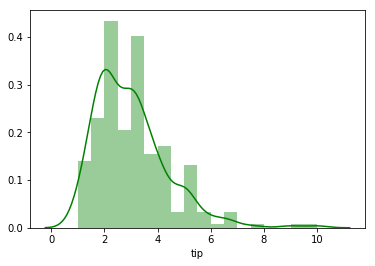

In [45]:
sns.distplot(tips.tip, color = 'green')


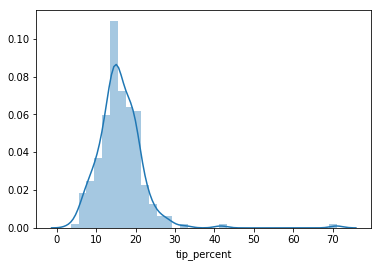

In [46]:
tips['tip_percent'] = 100 * tips['tip'] / tips['total_bill']

sns.distplot(tips['tip_percent'])

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

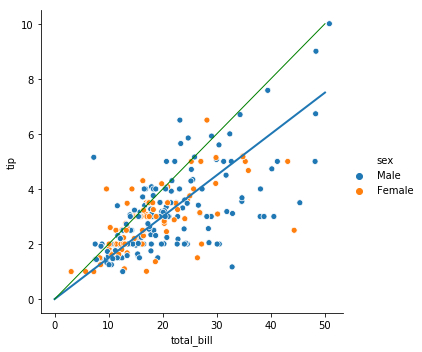

In [47]:
sns.relplot('total_bill', 'tip',  data = tips, hue = 'sex')
plt.plot([0, 50], [0, 7.5], linewidth=2) # 15% Tip line
plt.plot([0, 50], [0, 10], linewidth=1, color = 'g') # 20% Tip line


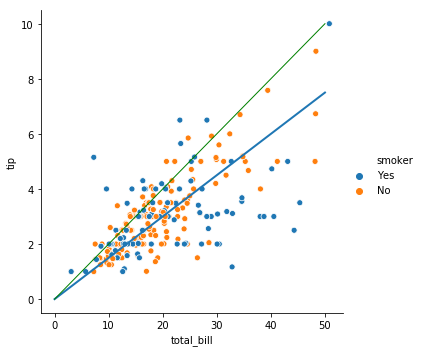

In [48]:
sns.relplot('total_bill', 'tip', data = tips, hue = 'smoker')
plt.plot([0, 50], [0, 7.5], linewidth=2) 
plt.plot([0, 50], [0, 10], linewidth=1, color = 'g') # 20% Tip line

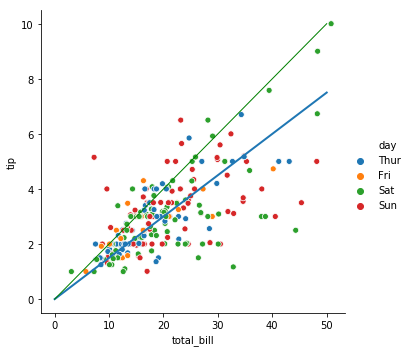

In [49]:
sns.relplot('total_bill', 'tip',  data = tips, hue = 'day')
plt.plot([0, 50], [0, 7.5], linewidth=2)
plt.plot([0, 50], [0, 10], linewidth=1, color = 'g') # 20% Tip line

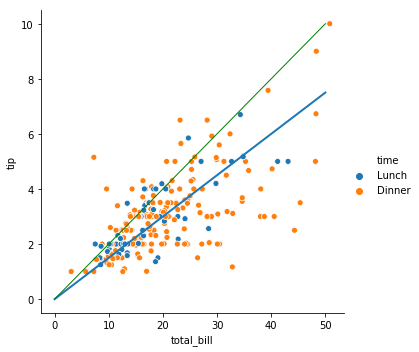

In [50]:
sns.relplot('total_bill', 'tip', data = tips, hue = 'time')
plt.plot([0, 50], [0, 7.5], linewidth=2)
plt.plot([0, 50], [0, 10], linewidth=1, color = 'g') # 20% Tip line

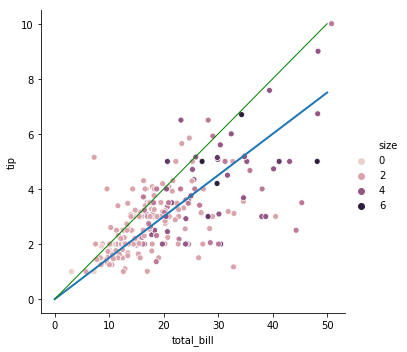

In [51]:
sns.relplot('total_bill', 'tip', data = tips, hue = 'size')
plt.plot([0, 50], [0, 7.5], linewidth=2)
plt.plot([0, 50], [0, 10], linewidth=1, color = 'g') # 20% Tip line

### Make univariate [categorical plot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

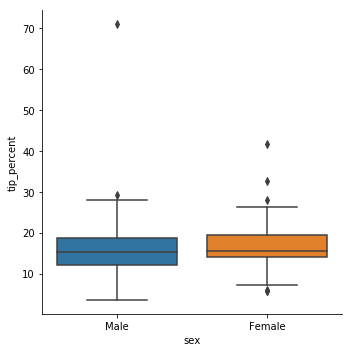

In [52]:
sns.catplot('sex', 'tip_percent', data = tips, kind = 'box')

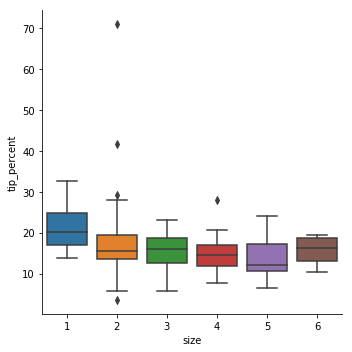

In [53]:
sns.catplot('size', 'tip_percent', data = tips, kind = 'box')

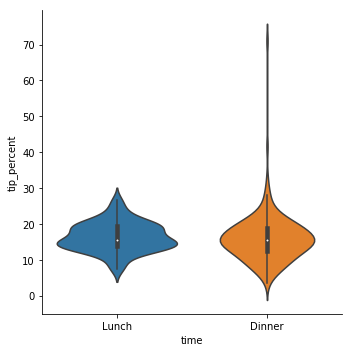

In [54]:
sns.catplot('time', 'tip_percent', data = tips, kind = 'violin')

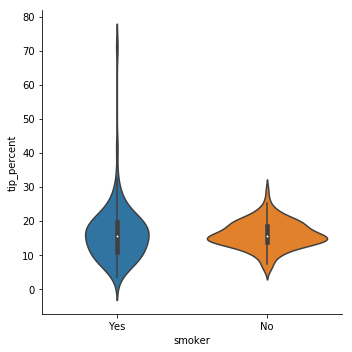

In [55]:
sns.catplot('smoker', 'tip_percent', data = tips, kind = 'violin')

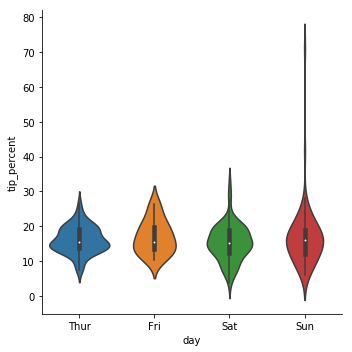

In [56]:
sns.catplot('day', 'tip_percent', data = tips, kind = 'violin')

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

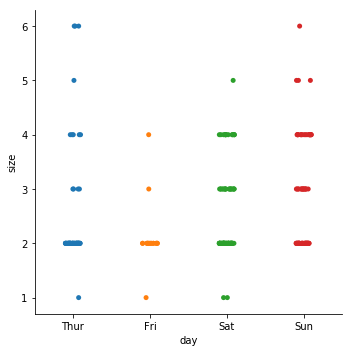

In [57]:
sns.catplot('day', 'size', data = tips, kind = 'strip')

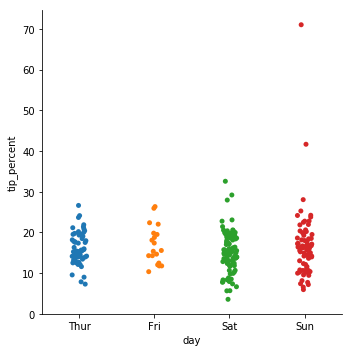

In [58]:
sns.catplot('day', 'tip_percent', data = tips, kind = 'strip')

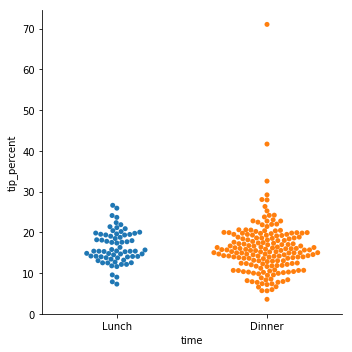

In [59]:
sns.catplot('time', 'tip_percent', data = tips, kind = 'swarm')

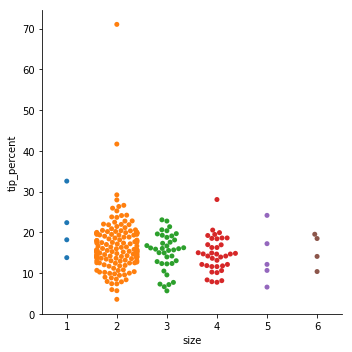

In [60]:
sns.catplot('size', 'tip_percent', data = tips, kind = 'swarm')

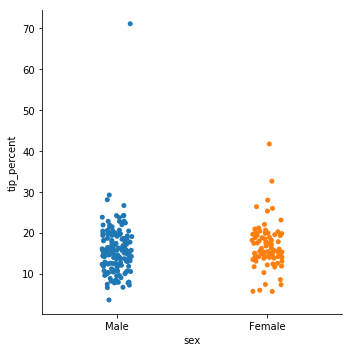

In [61]:
sns.catplot('sex', 'tip_percent', data = tips, kind = 'strip')

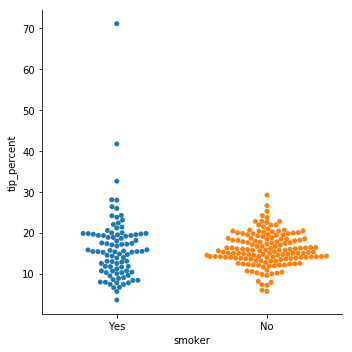

In [62]:
sns.catplot('smoker', 'tip_percent', data = tips, kind = 'swarm')

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [64]:
flights.shape

(144, 3)

### See the first 5 rows

In [65]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [66]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

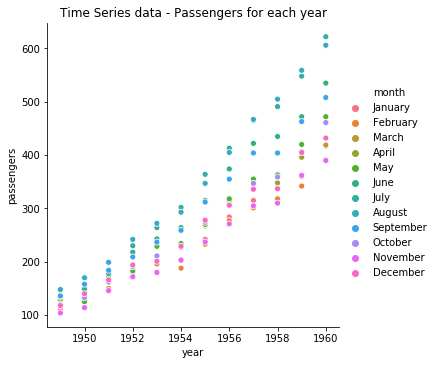

In [67]:
sns.relplot('year', 'passengers', data = flights, hue = 'month')
plt.title("Time Series data - Passengers for each year");

### Plot month & passengers

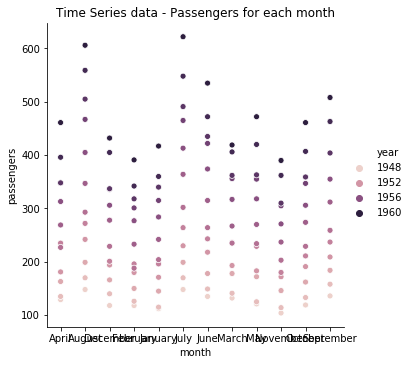

In [68]:
# Not as informative since months are in alphabetical, not chronological order

sns.relplot('month', 'passengers', data = flights, hue = 'year')
plt.title("Time Series data - Passengers for each month");

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [69]:
pt_flight = pd.pivot_table(flights, values = 'passengers', index = 'month', columns = 'year', aggfunc = np.sum)

pt_flight

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

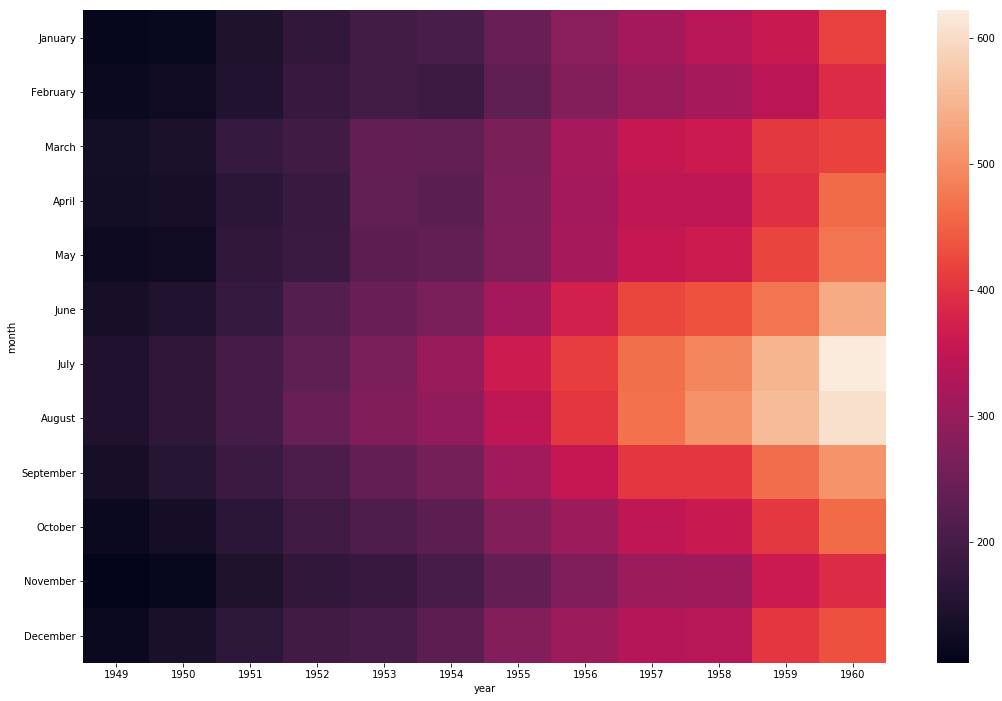

In [70]:
plt.subplots(figsize=(18,12))
sns.heatmap(pt_flight)

# plt.figure(figsize = (24,24)); #figsize(12,12)